In [82]:
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt


def CreateDataset():
    n = 40
    omega = rd.randn(1)
    noise = 0.8 * rd.randn(n)
    x = rd.randn(n, 2)
    y = 2 * (omega * x[:, 0] + x[:, 1] + noise > 0) - 1
    return np.array(x), np.array(y)

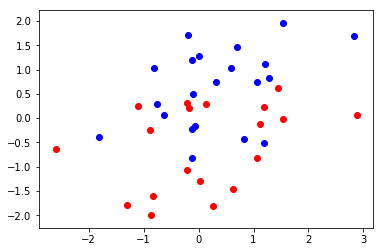

In [83]:
def DrawData(x, y):
    for xd, yd in zip(x, y):
        if yd == 1:
            plt.scatter(xd[0], xd[1], c='b')
        else:
            plt.scatter(xd[0], xd[1], c='r')
    plt.show()
    
x, y = CreateDataset()
DrawData(x, y)

In [84]:
def EV(weight):
    collect = 0
    for xd, yd in zip(x, y):
        predict = np.dot(weight, xd)
        if predict >= 0:
            py = 1
        else:
            py = -1
        if py == yd:
            collect += 1
    acc = collect / len(x)
    return acc

In [106]:
from sympy import *

w1 = Symbol('w1')
w2 = Symbol('w2')
W = np.array([w1, w2])
init_W = rd.rand(2)

J = 0
lamb = 0.5
for xd, yd in zip(x, y):
    J = J + log(1 + exp(-yd*np.dot(W.T, xd)))
J = J + lamb * np.dot(W.T, W)

dJ = diff(J, W)

LearningRate = 0.005
weight = init_W
bsg_J = []
bsg_acc = []
for t in range(100):
    bsg_J.append(J.subs([(w1, weight[0]), (w2, weight[1])]))
    bsg_acc.append(EV(weight))
    if t % 10 == 0:
        print(t)
    new_w = weight - LearningRate * dJ.subs([(w1, weight[0]), (w2, weight[1])])
    err = new_w - weight
    weight = new_w
weight_G  = weight
print('end')

0
10
20
30
40
50
60
70
80
90
end


In [107]:
d2J = diff(J, W, 2)

weight = init_W
d1= Symbol('d1')
d2= Symbol('d2')
dw = np.array([d1, d2])
newton_J = []
newton_acc = []
for t in range(100):
    newton_acc.append(EV(weight))
    newton_J.append(J.subs([(w1, weight[0]), (w2, weight[1])]))
    if t % 10 == 0:
        print(t)
    hessian = np.array(d2J.subs([(w1, weight[0]), (w2, weight[1])])).reshape(2, 2)
    new_w = weight + np.array(list(solve(np.dot(hessian, dw) + dJ.subs([(w1, weight[0]), (w2, weight[1])])).values()))
    weight = new_w
weight_N = weight
print('end')

0
10
20
30
40
50
60
70
80
90
end


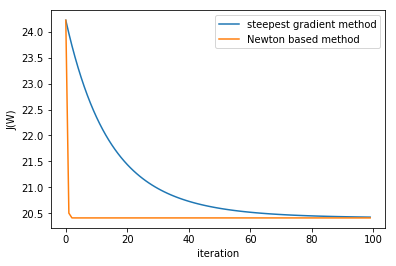

In [112]:
plt.plot(bsg_J, label='steepest gradient method')
plt.plot(newton_J, label='Newton based method')

plt.xlabel('iteration')
plt.ylabel('J(W)')
plt.legend()
plt.show()

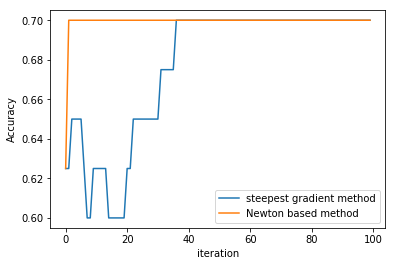

In [111]:
plt.plot(bsg_acc, label='steepest gradient method')
plt.plot(newton_acc, label='Newton based method')

plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

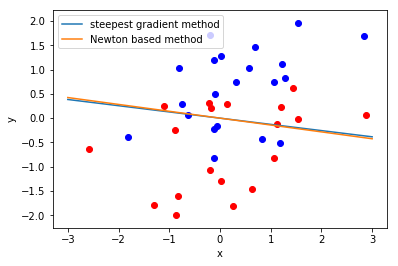

In [113]:
for xd, yd in zip(x, y):
    if yd == 1:
        plt.scatter(xd[0], xd[1], c='b')
    else:
        plt.scatter(xd[0], xd[1], c='r')

r = np.linspace(-3, 3)
line = r*weight_G[0] /weight_G[1]
plt.plot(r, line, label='steepest gradient method')

line2 = r*weight_N[0]/weight_N[1]
plt.plot(r, line2, label='Newton based method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()